In [1]:
import numpy
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import json
import argparse
from pandas.io.json import json_normalize
import dateutil.parser as dp 

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', None)

path = "/home/hadoop/covid/data.csv"
data = pd.read_csv(path, sep='~')

data['Date'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

data['Date'] = data['Date'].dt.normalize()

data['Deaths'] =  data['Deaths'].str.replace(',', '').astype(int)
#pd.to_numeric(data['Deaths'])
data['Cases'] = data['Cases'].str.replace(',', '').astype(int)
data['Recovered'] = data['Recovered'].str.replace(',', '').astype(int)

#print(data.head(5))
data = data.groupby(by=["Date"])["Cases", "Deaths", "Recovered"].mean().reset_index()

data['Cases'] = data['Cases'].round(2)
data['Deaths'] = data['Deaths'].round(2)
data['Recovered'] = data['Recovered'].round(2)
print(data.head(5))
#print(data.dtypes)

        Date      Cases    Deaths  Recovered
0 2020-03-29  705704.90  33192.56  149408.89
1 2020-03-30  761041.57  36367.11  160354.60
2 2020-03-31  831088.42  40639.56  174294.80
3 2020-04-01  907388.19  45409.67  189501.85
4 2020-04-02  987297.18  50920.01  207314.12


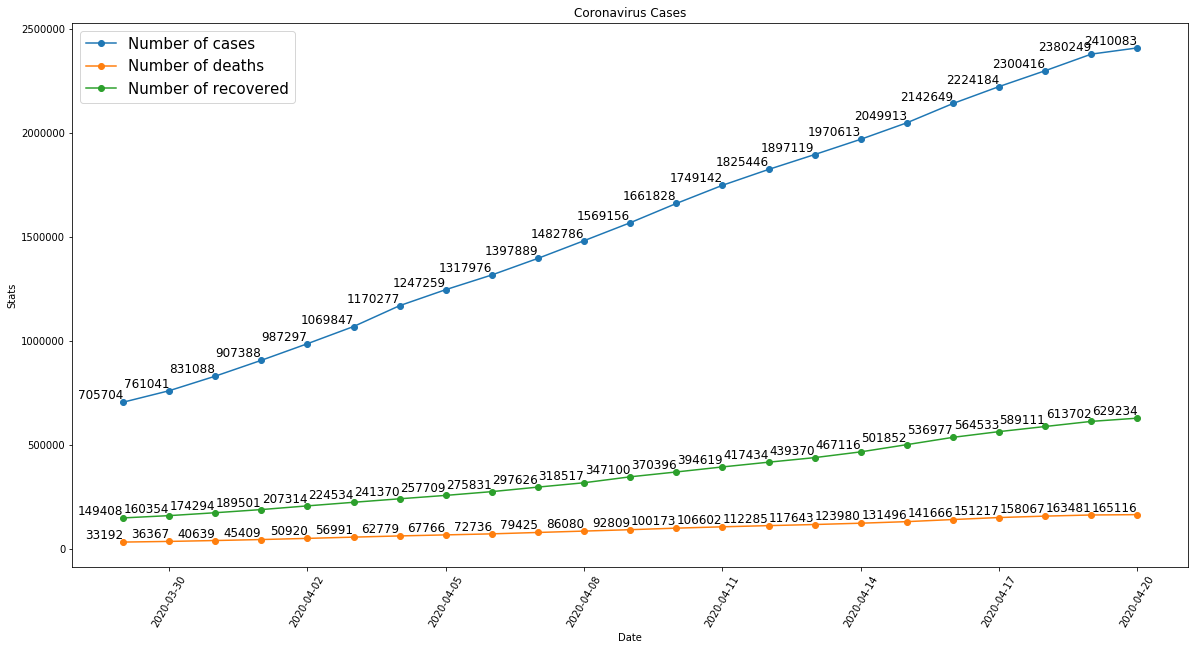

In [3]:
import math
def agg_plot(data):
	fig, axes = plt.subplots(figsize=(20,10))
	plt.xticks(rotation=60)
	axes.set_title("Coronavirus Cases")
	axes.set_xlabel("Date")
	axes.set_ylabel("Stats")

	axes.plot(data['Date'], data['Cases'], 'o-')
	axes.plot(data['Date'], data['Deaths'], 'o-')
	axes.plot(data['Date'], data['Recovered'], 'o-')

    #For showing the text value of each data point
	for a,b in zip(data['Date'], data['Cases']): 
	    plt.text(a, b, str(math.floor(b)), size=12, horizontalalignment='right',verticalalignment='bottom')

	for a,b in zip(data['Date'], data['Deaths']): 
	    plt.text(a, b, str(math.floor(b)), size=12, horizontalalignment='right',verticalalignment='bottom')
	    
	for a,b in zip(data['Date'], data['Recovered']): 
	    plt.text(a, b, str(math.floor(b)), size=12, horizontalalignment='right',verticalalignment='bottom')

	plt.legend(['Number of cases', 'Number of deaths ', 'Number of recovered'], loc='upper left', fontsize=15)

agg_plot(data)

In [4]:
# Data Segregation for Linear Regression based on individual values in date
new_data = data[['Cases', 'Recovered', 'Deaths']].copy()

#Need to convert the date to string, otherwise the Linear Regression doesn't 
data['Date_String'] = data['Date'].astype(str)
new_data['year'] = [int(x[0:4]) for x in data['Date_String']]
new_data['month'] = [int(x[5:7]) for x in data['Date_String']]
new_data['date'] = [int(x[8:10]) for x in data['Date_String']]

#new_data = new_data[:-1]
print(new_data)

         Cases  Recovered     Deaths  year  month  date
0    705704.90  149408.89   33192.56  2020      3    29
1    761041.57  160354.60   36367.11  2020      3    30
2    831088.42  174294.80   40639.56  2020      3    31
3    907388.19  189501.85   45409.67  2020      4     1
4    987297.18  207314.12   50920.01  2020      4     2
5   1069847.72  224534.51   56991.01  2020      4     3
6   1170277.12  241370.10   62779.48  2020      4     4
7   1247259.64  257709.17   67766.96  2020      4     5
8   1317976.90  275831.15   72736.72  2020      4     6
9   1397889.56  297626.12   79425.00  2020      4     7
10  1482786.05  318517.92   86080.31  2020      4     8
11  1569156.17  347100.06   92809.72  2020      4     9
12  1661828.11  370396.62  100173.95  2020      4    10
13  1749142.51  394619.79  106602.30  2020      4    11
14  1825446.15  417434.01  112285.82  2020      4    12
15  1897119.64  439370.46  117643.16  2020      4    13
16  1970613.94  467116.24  123980.93  2020      

In [5]:
def linear_prediction(param): 
    features = ['year','month','date']
    X = new_data[features]
    y = new_data[param]

    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size= 0.25, random_state=42)
        
    linearRegressor = LinearRegression()
        
    linearRegressor.fit(xTrain, yTrain)
        
    yPrediction = linearRegressor.predict(xTest)

    slope = linearRegressor.coef_
    intercept = linearRegressor.intercept_

    #Prediction of 20 April
    predict = (slope[0]*2020 + slope[1]*4 + slope[2]*20) + intercept
    print("Prediction of " +param+ ": " "{:,}".format(predict.round(0)))

print("Stats prediction for April 20,2020 using Linear Regression")    
predicted_cases  = linear_prediction('Cases')
predicted_cases  = linear_prediction('Deaths')
predicted_cases  = linear_prediction('Recovered')

Stats prediction for April 20,2020 using Linear Regression
Prediction of Cases: 2,466,563.0
Prediction of Deaths: 167,630.0
Prediction of Recovered: 625,039.0
